# Проверка нормальности распределения

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import statsmodels

Populating the interactive namespace from numpy and matplotlib


Загрузим данные - время реакции, с.

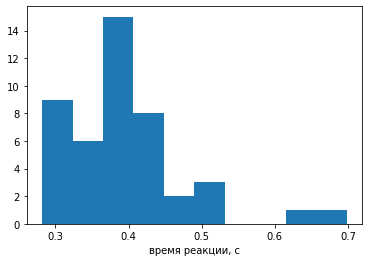

In [7]:
D = pd.read_table('d/rt.tsv')
vv=D.v.dropna()
hist(vv); xlabel('время реакции, с');

Стандартная проверка - по статистике хи-квадрат, комбинирующей z-тесты асимметрии и куртозиса.

In [4]:
import scipy.stats as stats

In [8]:
stats.normaltest(vv)

NormaltestResult(statistic=19.306090837311295, pvalue=6.422966266742602e-05)

p очень маленькое, значит отвергаем гипотезу о нормальности распределения. Увы, распределение ВР почти всегда скошено вправо.

Более мощный тест (по мнению [некоторых источников](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)) - Шапиро-Уилка (Shapiro-Wilk). Подходит для небольших выборок.

In [9]:
stats.shapiro(vv)

ShapiroResult(statistic=0.8942419290542603, pvalue=0.0006301295361481607)

p-value на порядок больше.

Тест Колмогорова-Смирнова может быть применен более широко, чем Шапиро, поскольку он сравнивает любые два распределения друг с другом, а не обязательно с нормальным.
Для правильного использования необходимо z-преобразование.

In [10]:
zz=(vv-vv.mean())/vv.std()
stats.kstest(zz, cdf='norm')

KstestResult(statistic=0.1330234060534219, pvalue=0.37054082680262057)

Еще есть тест Андерсона - вариант теста Колмогорова-Смирнова.

In [11]:
stats.anderson(vv)

AndersonResult(statistic=1.0696390939463, critical_values=array([0.535, 0.609, 0.731, 0.853, 1.014]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Только последние два теста на 5% уровне значимости показали, что распределение можно считать нормальным.

Попробуем убрать выбросы более .5 с из набора данных.

In [16]:
vv_ = vv[vv<0.5]
print(f'изменение размера {len(vv)} -> {len(vv_)}')

изменение размера 45 -> 40


In [17]:
stats.normaltest(vv_)

NormaltestResult(statistic=2.25019618656403, pvalue=0.3246206226942116)

In [14]:
stats.shapiro(vv_)

ShapiroResult(statistic=0.9592655301094055, pvalue=0.15807799994945526)

In [15]:
stats.kstest((vv_-vv_.mean())/vv_.std(), cdf='norm')

KstestResult(statistic=0.10612495428368313, pvalue=0.7187460361580543)

In [20]:
stats.anderson(vv_)

AndersonResult(statistic=0.47606646495707139, critical_values=array([ 0.531,  0.605,  0.726,  0.847,  1.007]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Вывод: после удаления выбросов можно использовать параметрические методы для анализа ВР.